대통령 : 114
기사 : 80
원문 : 78
오늘 : 68
뉴스룸 : 64
탄핵 : 44
앵커 : 33
청와대 : 31
보도 : 26
박근혜 : 25
라이브 : 24
한마디 : 23
브리핑 : 23
수사 : 22
검찰 : 20
특검 : 19
단독 : 19
국정 : 19
심판 : 17
관련 : 17
페이스북 : 17
뉴스특보 : 16
세월호 : 16
종료 : 15
의혹 : 15
우리 : 14
사람 : 14
최씨 : 14
사건 : 14
조사 : 13
시민 : 13
태블릿 : 13
사실 : 12
대리인 : 12
상황 : 12
시간 : 12


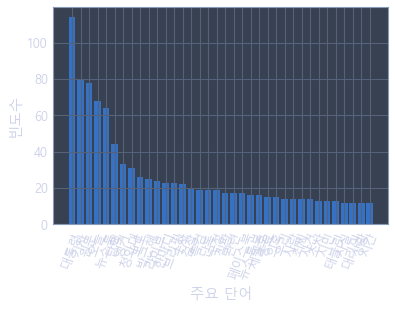

AttributeError: Invalid font name. Should be one of Nobile, Old Standard TT, Cantarell, Reenie Beanie, Cuprum, Molengo, Neucha, Philosopher, Yanone Kaffeesatz, Cardo, Neuton, Inconsolata, Crimson Text, Josefin Sans, Droid Sans, Lobster, IM Fell DW Pica, Vollkorn, Tangerine, Coustard, PT Sans Regular

In [25]:
import json
import re

from konlpy.tag import Twitter
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pytagcloud
import webbrowser

import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme = "oceans16")

font_name = font_manager.FontProperties(fname = "C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#[CODE 1]

def showGraph(wordInfo):

    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

#[CODE 2]

def saveWordCloud(wordInfo, filename):
    
    taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
    pytagcloud.create_tag_image(taglist, filename, size=(640, 480), fontname='korean', rectangular=False)
    webbrowser.open(filename)

def main():
    #여기서 파일의 경로는 실제 JSON 데이터가 저장된 경로이다

    openFileName = 'jtbcnews_facebook_2016-10-01_2017-03-12.json'
    #openFileName = 'd:/Temp/FB_DATA/jtbcnews_facebook_2016-10-01_2017-03-12.json'

    cloudImagePath = openFileName + '.jpg'
    
    rfile = open(openFileName, 'r', encoding='utf-8').read()
    
    jsonData = json.loads(rfile)
    message = ''

    #[CODE 3]

    for item in jsonData:
        if 'message' in item.keys():
            message = message + re.sub(r'[^\w]', ' ', item['message']) + ' '
    
    #[CODE 4]

    nlp = Twitter()
    nouns = nlp.nouns(message)
    count = Counter(nouns)

#[CODE 5]

    wordInfo = dict()
    for tags, counts in count.most_common(50):
        if (len(str(tags)) > 1):
            wordInfo[tags] = counts
            print ("%s : %d" % (tags, counts))
            
    showGraph(wordInfo)
    saveWordCloud(wordInfo, cloudImagePath)
    
if __name__ == "__main__":
    main()